Explorando la carpeta: Diclofenac
Explorando la carpeta: Diclofenac\Diclofenac_B3LYP_6-311+G
Explorando la carpeta: Diclofenac\Diclofenac_B3LYP_6-311+G\Diclofenac_B3LYP_6-311+G_orca_files
Explorando la carpeta: Diclofenac\Diclofenac_B3LYP_def2-TZVP
Explorando la carpeta: Diclofenac\Diclofenac_B3LYP_def2-TZVP\Diclofenac_B3LYP_def2-TZVP_orca_files
Explorando la carpeta: Diclofenac\Diclofenac_B3LYP_STO-3G
Explorando la carpeta: Diclofenac\Diclofenac_B3LYP_STO-3G\Diclofenac_B3LYP_STO-3G_orca_files
Explorando la carpeta: Diclofenac\Diclofenac_PBE_6-311+G
Explorando la carpeta: Diclofenac\Diclofenac_PBE_6-311+G\Diclofenac_PBE_6-311+G_orca_files
Explorando la carpeta: Diclofenac\Diclofenac_PBE_def2-TZVP
Explorando la carpeta: Diclofenac\Diclofenac_PBE_def2-TZVP\Diclofenac_PBE_def2-TZVP_orca_files
Explorando la carpeta: Diclofenac\Diclofenac_PBE_STO-3G
Explorando la carpeta: Diclofenac\Diclofenac_PBE_STO-3G\Diclofenac_PBE_STO-3G_orca_files
Explorando la carpeta: Diclofenac\Diclofenac_TPSS_6-31

C:\Users\oestr\AppData\Local\Temp\ipykernel_2460\1217644324.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['CM-1', 'Total', '2.36A', '3.31A', '5.99A'])


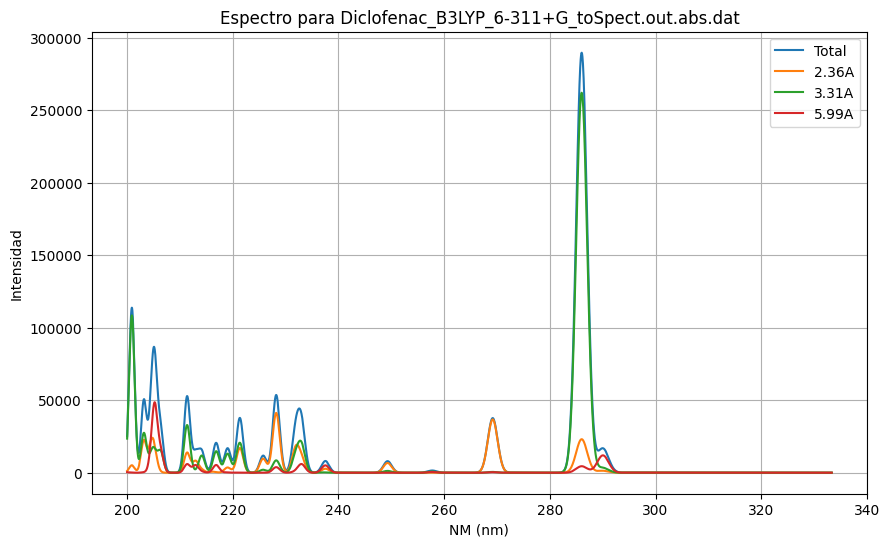

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Función para procesar cada archivo .dat
def process_dat_file(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['CM-1', 'Total', '2.36A', '3.31A', '5.99A'])
    df['NM'] = 10000000 / df['CM-1']
    df = df[['CM-1', 'NM', 'Total', '2.36A', '3.31A', '5.99A']]
    plt.figure(figsize=(10, 6))
    plt.plot(df['NM'], df['Total'], label='Total')
    plt.plot(df['NM'], df['2.36A'], label='2.36A')
    plt.plot(df['NM'], df['3.31A'], label='3.31A')
    plt.plot(df['NM'], df['5.99A'], label='5.99A')
    plt.xlabel('NM (nm)')
    plt.ylabel('Intensidad')
    plt.title(f"Espectro para {os.path.basename(file_path)}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Ruta base donde se encuentran las carpetas
base_directory = r'Diclofenac'

# Usar os.walk para buscar los archivos
found_files = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('_toSpect.out.abs.dat'):
            file_path = os.path.join(root, file)
            found_files.append(file_path)
            

# Si no se encuentran archivos, mostrar un mensaje
if not found_files:
    print("No se encontraron archivos .dat que terminen en '_toSpect.out.abs.dat'.")
else:
    for file_path in found_files:
        print(f"Procesando archivo: {file_path}")
        process_dat_file(file_path)
